In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model as lm
from sklearn import metrics
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
import scipy.stats as stat
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train=pd.read_csv('Pr_train_20.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

In [19]:
cols_to_not_use = {'Excess','FUTURE 24 WEEK RETURNS', 'IDENTIFIER', 'PERIOD (FORMATTED)'}
cols_to_use = list(filter(lambda c: c not in cols_to_not_use, df_train.columns))

In [20]:
cols_to_use

['RANK',
 '1M_RET',
 'MCAP',
 '1SS_ERNQLT',
 'IST_SURPY1',
 'ACCX',
 'ARM_PFD_COMP',
 'RET24M_L1M',
 'RSI_12M.1',
 'MIN12M.1',
 'CASH_P.1',
 'EV.1',
 'RVM_CFO_AST.1',
 'VALUE_COM.1',
 'QUALITY.1',
 'RISK',
 'TECHNICAL1.1',
 'PP_RANK',
 'RANK_Lag',
 'MCAP_Lag',
 '1SS_ERNQLT_Lag',
 'IST_SURPY1_Lag',
 'ACCX_Lag',
 'ARM_PFD_COMP_Lag',
 'CASH_P.1_Lag',
 'EV.1_Lag',
 'RVM_CFO_AST.1_Lag',
 'VALUE_COM.1_Lag',
 'QUALITY.1_Lag',
 'RISK_Lag',
 'TECHNICAL1.1_Lag']

In [14]:
df_train=df_train.reset_index()

In [35]:
df_train['RANK_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RANK'].shift(3)
df_train['MCAP_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['MCAP'].shift(3)
df_train['1SS_ERNQLT_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['1SS_ERNQLT'].shift(3)
df_train['IST_SURPY1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['IST_SURPY1'].shift(3)
df_train['ACCX_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ACCX'].shift(3)
df_train['ARM_PFD_COMP_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ARM_PFD_COMP'].shift(3)
df_train['CASH_P.1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['CASH_P.1'].shift(3)
df_train['EV.1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['EV.1'].shift(3)
df_train['RVM_CFO_AST.1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RVM_CFO_AST.1'].shift(3)
df_train['VALUE_COM.1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['VALUE_COM.1'].shift(3)
df_train['QUALITY.1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['QUALITY.1'].shift(3)
df_train['RISK_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RISK'].shift(3)
df_train['TECHNICAL1.1_Lag'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['TECHNICAL1.1'].shift(3)
df_train['PP_RANK'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['PP_RANK'].shift(3)

In [36]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)            0
IDENTIFIER                    0
RANK                          0
1M_RET                        0
MCAP                          0
1SS_ERNQLT                    0
IST_SURPY1                    0
ACCX                          0
ARM_PFD_COMP                  0
RET24M_L1M                    0
RSI_12M.1                     0
MIN12M.1                      0
CASH_P.1                      0
EV.1                          0
RVM_CFO_AST.1                 0
VALUE_COM.1                   0
QUALITY.1                     0
RISK                          0
TECHNICAL1.1                  0
PP_RANK                   14196
FUTURE 24 WEEK RETURNS        0
Excess                        0
RANK_Lag                  14196
MCAP_Lag                  14196
1SS_ERNQLT_Lag            14196
IST_SURPY1_Lag            14196
ACCX_Lag                  14196
ARM_PFD_COMP_Lag          14196
CASH_P.1_Lag              14196
EV.1_Lag                  14196
RVM_CFO_AST.1_Lag         14196
VALUE_CO

In [37]:
df_train=df_train.dropna(subset=['RANK_Lag','PP_RANK','MCAP_Lag','1SS_ERNQLT_Lag','IST_SURPY1_Lag','ACCX_Lag','ARM_PFD_COMP_Lag'
                                ,'CASH_P.1_Lag','EV.1_Lag','RVM_CFO_AST.1_Lag','VALUE_COM.1_Lag','QUALITY.1_Lag','RISK_Lag','TECHNICAL1.1_Lag'])

In [38]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)        0
IDENTIFIER                0
RANK                      0
1M_RET                    0
MCAP                      0
1SS_ERNQLT                0
IST_SURPY1                0
ACCX                      0
ARM_PFD_COMP              0
RET24M_L1M                0
RSI_12M.1                 0
MIN12M.1                  0
CASH_P.1                  0
EV.1                      0
RVM_CFO_AST.1             0
VALUE_COM.1               0
QUALITY.1                 0
RISK                      0
TECHNICAL1.1              0
PP_RANK                   0
FUTURE 24 WEEK RETURNS    0
Excess                    0
RANK_Lag                  0
MCAP_Lag                  0
1SS_ERNQLT_Lag            0
IST_SURPY1_Lag            0
ACCX_Lag                  0
ARM_PFD_COMP_Lag          0
CASH_P.1_Lag              0
EV.1_Lag                  0
RVM_CFO_AST.1_Lag         0
VALUE_COM.1_Lag           0
QUALITY.1_Lag             0
RISK_Lag                  0
TECHNICAL1.1_Lag          0
dtype: int64

In [39]:
df_test=pd.read_csv('Pr_test_20.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

In [40]:
df_test=df_test.reset_index()

In [41]:
df_test['RANK_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RANK'].shift(3)
df_test['MCAP_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['MCAP'].shift(3)
df_test['1SS_ERNQLT_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['1SS_ERNQLT'].shift(3)
df_test['IST_SURPY1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['IST_SURPY1'].shift(3)
df_test['ACCX_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ACCX'].shift(3)
df_test['ARM_PFD_COMP_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ARM_PFD_COMP'].shift(3)
df_test['CASH_P.1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['CASH_P.1'].shift(3)
df_test['EV.1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['EV.1'].shift(3)
df_test['RVM_CFO_AST.1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RVM_CFO_AST.1'].shift(3)
df_test['VALUE_COM.1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['VALUE_COM.1'].shift(3)
df_test['QUALITY.1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['QUALITY.1'].shift(3)
df_test['RISK_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RISK'].shift(3)
df_test['TECHNICAL1.1_Lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['TECHNICAL1.1'].shift(3)
df_test['PP_RANK_lag'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['PP_RANK'].shift(3)

In [42]:
df_test=df_test.dropna(subset=['RANK_Lag','PP_RANK','MCAP_Lag','1SS_ERNQLT_Lag','IST_SURPY1_Lag','ACCX_Lag','ARM_PFD_COMP_Lag'
                                ,'CASH_P.1_Lag','EV.1_Lag','RVM_CFO_AST.1_Lag','VALUE_COM.1_Lag','QUALITY.1_Lag','RISK_Lag','TECHNICAL1.1_Lag'])

## Extra Tree

In [25]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

In [30]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

In [31]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.920370307096206

## Ridge

In [32]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

In [33]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

In [34]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

19.005051307596368

## Extra Tree for lag=3

In [43]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

In [44]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

In [45]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.890523819153699

## Ridge

In [46]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

In [47]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

In [48]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

19.000162208745042

## Difference

In [50]:
df_train['Diff_Lag_RANK'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RANK'].diff()
df_train['Diff_Lag_MCAP'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['MCAP'].diff()
df_train['Diff_Lag_1SS_ERNQLT'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['1SS_ERNQLT'].diff()
df_train['Diff_Lag_IST_SURPY1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['IST_SURPY1'].diff()
df_train['Diff_Lag_ACCX'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ACCX'].diff()
df_train['Diff_Lag_ARM_PFD_COMP'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ARM_PFD_COMP'].diff()
df_train['Diff_Lag_CASH_P.1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['CASH_P.1'].diff()
df_train['Diff_Lag_EV.1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['EV.1'].diff()
df_train['Diff_Lag_RVM_CFO_AST.1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RVM_CFO_AST.1'].diff()
df_train['Diff_Lag_VALUE_COM.1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['VALUE_COM.1'].diff()
df_train['Diff_Lag_QUALITY.1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['QUALITY.1'].diff()
df_train['Diff_Lag_RISK'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RISK'].diff()
df_train['Diff_Lag_TECHNICAL1.1'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['TECHNICAL1.1'].diff()
df_train['Diff_Lag_PP_RANK'] = df_train.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['PP_RANK'].diff()

In [51]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)           0
IDENTIFIER                   0
RANK                         0
1M_RET                       0
MCAP                         0
1SS_ERNQLT                   0
IST_SURPY1                   0
ACCX                         0
ARM_PFD_COMP                 0
RET24M_L1M                   0
RSI_12M.1                    0
MIN12M.1                     0
CASH_P.1                     0
EV.1                         0
RVM_CFO_AST.1                0
VALUE_COM.1                  0
QUALITY.1                    0
RISK                         0
TECHNICAL1.1                 0
PP_RANK                      0
FUTURE 24 WEEK RETURNS       0
Excess                       0
RANK_Lag                     0
MCAP_Lag                     0
1SS_ERNQLT_Lag               0
IST_SURPY1_Lag               0
ACCX_Lag                     0
ARM_PFD_COMP_Lag             0
CASH_P.1_Lag                 0
EV.1_Lag                     0
RVM_CFO_AST.1_Lag            0
VALUE_COM.1_Lag              0
QUALITY.

In [67]:
df_train=df_train.dropna(subset=['Diff_Lag_RANK','Diff_Lag_PP_RANK','Diff_Lag_MCAP','Diff_Lag_1SS_ERNQLT','Diff_Lag_IST_SURPY1','Diff_Lag_ACCX','Diff_Lag_ARM_PFD_COMP'
                                ,'Diff_Lag_CASH_P.1','Diff_Lag_EV.1','Diff_Lag_RVM_CFO_AST.1','Diff_Lag_VALUE_COM.1','Diff_Lag_QUALITY.1','Diff_Lag_RISK','Diff_Lag_TECHNICAL1.1'])

In [68]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)        0
IDENTIFIER                0
RANK                      0
1M_RET                    0
MCAP                      0
1SS_ERNQLT                0
IST_SURPY1                0
ACCX                      0
ARM_PFD_COMP              0
RET24M_L1M                0
RSI_12M.1                 0
MIN12M.1                  0
CASH_P.1                  0
EV.1                      0
RVM_CFO_AST.1             0
VALUE_COM.1               0
QUALITY.1                 0
RISK                      0
TECHNICAL1.1              0
PP_RANK                   0
FUTURE 24 WEEK RETURNS    0
Excess                    0
RANK_Lag                  0
MCAP_Lag                  0
1SS_ERNQLT_Lag            0
IST_SURPY1_Lag            0
ACCX_Lag                  0
ARM_PFD_COMP_Lag          0
CASH_P.1_Lag              0
EV.1_Lag                  0
RVM_CFO_AST.1_Lag         0
VALUE_COM.1_Lag           0
QUALITY.1_Lag             0
RISK_Lag                  0
TECHNICAL1.1_Lag          0
Diff_Lag_RANK       

In [82]:
cols_to_not_use = {'Excess','FUTURE 24 WEEK RETURNS', 'IDENTIFIER', 'PERIOD (FORMATTED)'}
cols_to_use = list(filter(lambda c: c not in cols_to_not_use, df_train.columns))

In [61]:
df_test['Diff_Lag_RANK'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RANK'].diff()
df_test['Diff_Lag_MCAP'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['MCAP'].diff()
df_test['Diff_Lag_1SS_ERNQLT'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['1SS_ERNQLT'].diff()
df_test['Diff_Lag_IST_SURPY1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['IST_SURPY1'].diff()
df_test['Diff_Lag_ACCX'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ACCX'].diff()
df_test['Diff_Lag_ARM_PFD_COMP'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['ARM_PFD_COMP'].diff()
df_test['Diff_Lag_CASH_P.1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['CASH_P.1'].diff()
df_test['Diff_Lag_EV.1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['EV.1'].diff()
df_test['Diff_Lag_RVM_CFO_AST.1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RVM_CFO_AST.1'].diff()
df_test['Diff_Lag_VALUE_COM.1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['VALUE_COM.1'].diff()
df_test['Diff_Lag_QUALITY.1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['QUALITY.1'].diff()
df_test['Diff_Lag_RISK'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['RISK'].diff()
df_test['Diff_Lag_TECHNICAL1.1'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['TECHNICAL1.1'].diff()
df_test['Diff_Lag_PP_RANK'] = df_test.sort_values(['PERIOD (FORMATTED)']).groupby(['IDENTIFIER'])['PP_RANK'].diff()

In [62]:
df_test=df_test.dropna(subset=['Diff_Lag_RANK','Diff_Lag_PP_RANK','Diff_Lag_MCAP','Diff_Lag_1SS_ERNQLT','Diff_Lag_IST_SURPY1','Diff_Lag_ACCX','Diff_Lag_ARM_PFD_COMP'
                                ,'Diff_Lag_CASH_P.1','Diff_Lag_EV.1','Diff_Lag_RVM_CFO_AST.1','Diff_Lag_VALUE_COM.1','Diff_Lag_QUALITY.1','Diff_Lag_RISK','Diff_Lag_TECHNICAL1.1'])

## Extra Tree

In [57]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

In [63]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])

In [64]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.879556848824297

## Ridge

In [69]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

In [70]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])

In [71]:
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

18.889433977808462

In [74]:
df_train.columns

Index(['PERIOD (FORMATTED)', 'IDENTIFIER', 'RANK', '1M_RET', 'MCAP',
       '1SS_ERNQLT', 'IST_SURPY1', 'ACCX', 'ARM_PFD_COMP', 'RET24M_L1M',
       'RSI_12M.1', 'MIN12M.1', 'CASH_P.1', 'EV.1', 'RVM_CFO_AST.1',
       'VALUE_COM.1', 'QUALITY.1', 'RISK', 'TECHNICAL1.1', 'PP_RANK',
       'FUTURE 24 WEEK RETURNS', 'Excess', 'RANK_Lag', 'MCAP_Lag',
       '1SS_ERNQLT_Lag', 'IST_SURPY1_Lag', 'ACCX_Lag', 'ARM_PFD_COMP_Lag',
       'CASH_P.1_Lag', 'EV.1_Lag', 'RVM_CFO_AST.1_Lag', 'VALUE_COM.1_Lag',
       'QUALITY.1_Lag', 'RISK_Lag', 'TECHNICAL1.1_Lag', 'Diff_Lag_RANK',
       'Diff_Lag_MCAP', 'Diff_Lag_1SS_ERNQLT', 'Diff_Lag_IST_SURPY1',
       'Diff_Lag_ACCX', 'Diff_Lag_ARM_PFD_COMP', 'Diff_Lag_CASH_P.1',
       'Diff_Lag_EV.1', 'Diff_Lag_RVM_CFO_AST.1', 'Diff_Lag_VALUE_COM.1',
       'Diff_Lag_QUALITY.1', 'Diff_Lag_RISK', 'Diff_Lag_TECHNICAL1.1',
       'Diff_Lag_PP_RANK'],
      dtype='object')

## More Features

In [79]:
df_train['RANK_Sum_Lag'] = df_train.apply(lambda row: row['RANK'] + row['RANK_Lag'], axis=1)
df_test['RANK_Sum_Lag'] = df_test.apply(lambda row: row['RANK'] + row['RANK_Lag'], axis=1)
df_train['MCAP_Sum_Lag'] = df_train.apply(lambda row: row['MCAP'] + row['MCAP_Lag'], axis=1)
df_test['MCAP_Sum_Lag'] = df_test.apply(lambda row: row['MCAP'] + row['MCAP_Lag'], axis=1)
df_train['1SS_ERNQLT_Sum_Lag'] = df_train.apply(lambda row: row['1SS_ERNQLT'] + row['1SS_ERNQLT_Lag'], axis=1)
df_test['1SS_ERNQLT_Sum_Lag'] = df_test.apply(lambda row: row['1SS_ERNQLT'] + row['1SS_ERNQLT_Lag'], axis=1)
df_train['IST_SURPY1_Sum_Lag'] = df_train.apply(lambda row: row['IST_SURPY1'] + row['IST_SURPY1_Lag'], axis=1)
df_test['IST_SURPY1_Sum_Lag'] = df_test.apply(lambda row: row['IST_SURPY1'] + row['IST_SURPY1_Lag'], axis=1)
df_train['ACCX_Sum_Lag'] = df_train.apply(lambda row: row['ACCX'] + row['ACCX_Lag'], axis=1)
df_test['ACCX_Sum_Lag'] = df_test.apply(lambda row: row['ACCX'] + row['ACCX_Lag'], axis=1)
df_train['ARM_PFD_COMP_Sum_Lag'] = df_train.apply(lambda row: row['ARM_PFD_COMP'] + row['ARM_PFD_COMP_Lag'], axis=1)
df_test['ARM_PFD_COMP_Sum_Lag'] = df_test.apply(lambda row: row['ARM_PFD_COMP'] + row['ARM_PFD_COMP_Lag'], axis=1)
df_train['CASH_P.1_Sum_Lag'] = df_train.apply(lambda row: row['CASH_P.1'] + row['CASH_P.1_Lag'], axis=1)
df_test['CASH_P.1_Sum_Lag'] = df_test.apply(lambda row: row['CASH_P.1'] + row['CASH_P.1_Lag'], axis=1)
df_train['EV.1_Sum_Lag'] = df_train.apply(lambda row: row['EV.1'] + row['EV.1_Lag'], axis=1)
df_test['EV.1_Sum_Lag'] = df_test.apply(lambda row: row['EV.1'] + row['EV.1_Lag'], axis=1)
df_train['RVM_CFO_AST.1_Sum_Lag'] = df_train.apply(lambda row: row['RVM_CFO_AST.1'] + row['RVM_CFO_AST.1_Lag'], axis=1)
df_test['RVM_CFO_AST.1_Sum_Lag'] = df_test.apply(lambda row: row['RVM_CFO_AST.1'] + row['RVM_CFO_AST.1_Lag'], axis=1)
df_train['VALUE_COM.1_Sum_Lag'] = df_train.apply(lambda row: row['VALUE_COM.1'] + row['VALUE_COM.1_Lag'], axis=1)
df_test['VALUE_COM.1_Sum_Lag'] = df_test.apply(lambda row: row['VALUE_COM.1'] + row['VALUE_COM.1_Lag'], axis=1)
df_train['QUALITY.1_Sum_Lag'] = df_train.apply(lambda row: row['QUALITY.1'] + row['QUALITY.1_Lag'], axis=1)
df_test['QUALITY.1_Sum_Lag'] = df_test.apply(lambda row: row['QUALITY.1'] + row['QUALITY.1_Lag'], axis=1)
df_train['RISK_Sum_Lag'] = df_train.apply(lambda row: row['RISK'] + row['RISK_Lag'], axis=1)
df_test['RISK_Sum_Lag'] = df_test.apply(lambda row: row['RISK'] + row['RISK_Lag'], axis=1)
df_train['TECHNICAL1.1_Sum_Lag'] = df_train.apply(lambda row: row['TECHNICAL1.1'] + row['TECHNICAL1.1_Lag'], axis=1)
df_test['TECHNICAL1.1_Sum_Lag'] = df_test.apply(lambda row: row['TECHNICAL1.1'] + row['TECHNICAL1.1_Lag'], axis=1)

In [80]:
df_train.isnull().values.any()
df_train.isnull().sum()

PERIOD (FORMATTED)        0
IDENTIFIER                0
RANK                      0
1M_RET                    0
MCAP                      0
1SS_ERNQLT                0
IST_SURPY1                0
ACCX                      0
ARM_PFD_COMP              0
RET24M_L1M                0
RSI_12M.1                 0
MIN12M.1                  0
CASH_P.1                  0
EV.1                      0
RVM_CFO_AST.1             0
VALUE_COM.1               0
QUALITY.1                 0
RISK                      0
TECHNICAL1.1              0
PP_RANK                   0
FUTURE 24 WEEK RETURNS    0
Excess                    0
RANK_Lag                  0
MCAP_Lag                  0
1SS_ERNQLT_Lag            0
IST_SURPY1_Lag            0
ACCX_Lag                  0
ARM_PFD_COMP_Lag          0
CASH_P.1_Lag              0
EV.1_Lag                  0
                         ..
QUALITY.1_Lag             0
RISK_Lag                  0
TECHNICAL1.1_Lag          0
Diff_Lag_RANK             0
Diff_Lag_MCAP       

In [83]:
ETR_model = ExtraTreesRegressor(n_estimators=100, max_depth=4, n_jobs=-1, random_state=17, verbose=0)
model2 = ETR_model.fit(df_train[cols_to_use], df_train['Excess'])

In [84]:
Preds_Excess_2=model2.predict(df_test[cols_to_use])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_2))

18.866030181514102

In [88]:
Rid=Ridge()
model3=Rid.fit(df_train[cols_to_use], df_train['Excess'])

In [89]:
Preds_Excess_4=model3.predict(df_test[cols_to_use])
#RMSE
np.sqrt(metrics.mean_squared_error(df_test['Excess'],Preds_Excess_4))

18.889218555663675

In [85]:
imp = pd.DataFrame(index=cols_to_use)
imp['train'] = pd.Series(model2.feature_importances_, index=cols_to_use)

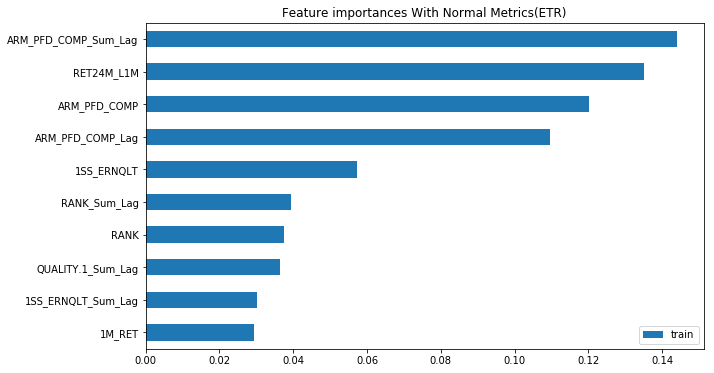

In [86]:
ax = imp.sort_values('train').tail(10).plot.barh(title='Feature importances With Normal Metrics(ETR)', figsize=(10,6))

In [90]:
imp_R = pd.DataFrame(index=cols_to_use)
imp_R['train'] = pd.Series(model3.coef_, index=cols_to_use)

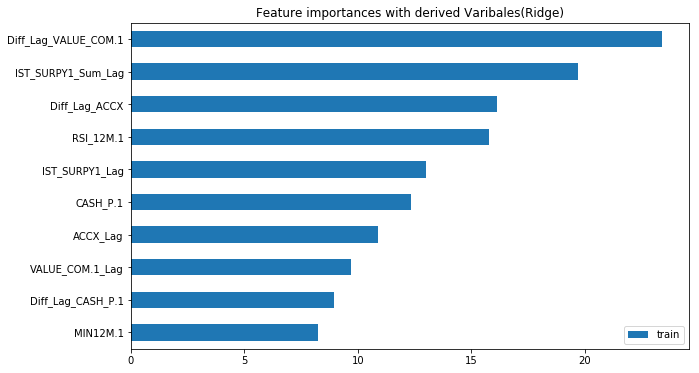

In [91]:
ax = imp_R.sort_values('train').tail(10).plot.barh(title='Feature importances with derived Varibales(Ridge)', figsize=(10,6))

In [93]:
df_test['Excess_Predicted_ET']=Preds_Excess_2
df_test['Excess_Predicted_Ridge']=Preds_Excess_4
df_test['Error_ET'] = df_test['Excess']-df_test['Excess_Predicted_ET']
df_test['Val_R'] = df_test['Excess']-df_test['Excess_Predicted_Ridge']

In [94]:
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:", fig_size)
fig_size[0] = 12
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
print ("Current size:", fig_size)

Current size: [6.0, 4.0]
Current size: [12, 10]


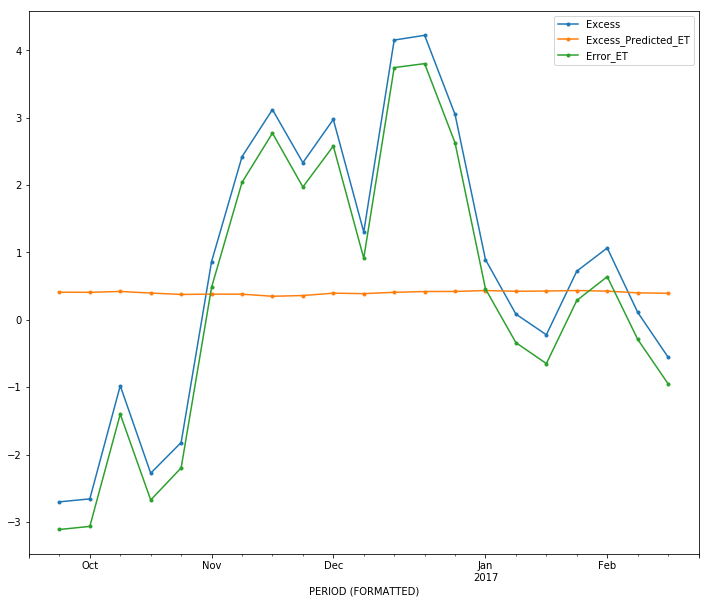

In [95]:
df_test.groupby('PERIOD (FORMATTED)')['Excess','Excess_Predicted_ET','Error_ET'].mean().plot(marker='.')

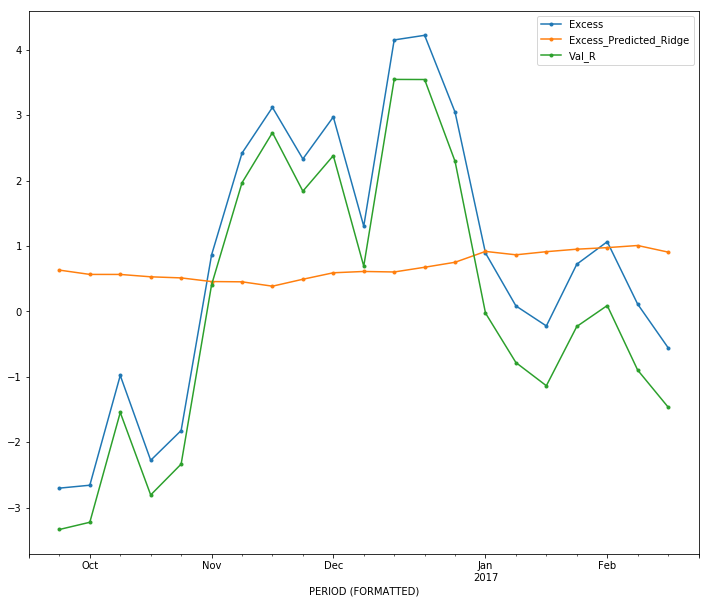

In [96]:
df_test.groupby('PERIOD (FORMATTED)')['Excess','Excess_Predicted_Ridge','Val_R'].mean().plot(marker='.')